# Remoção de Tendência com Regressão Linear
Prof. Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas import Series
from datetime import datetime

In [2]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
X = np.array(range(len(data))).reshape(-1, 1)
y = data.values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
detrended = y - trend

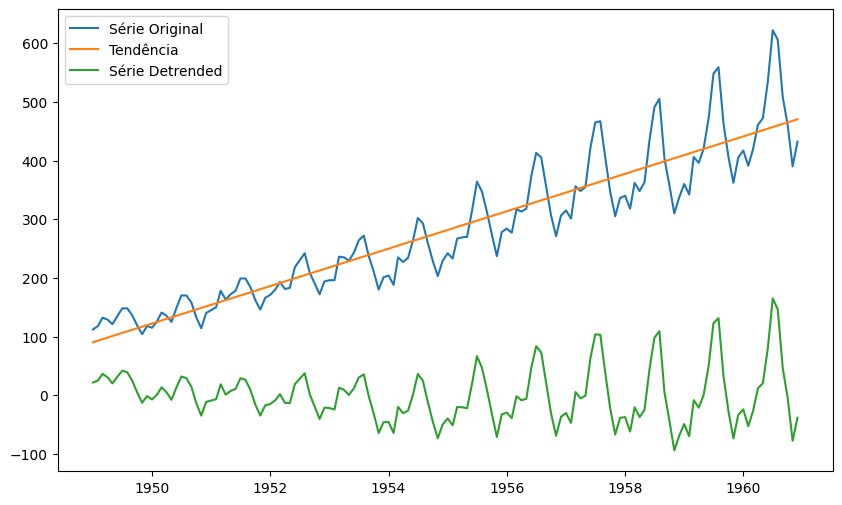

In [4]:
# Plotar a série original, a tendência e a série detrended
plt.figure(figsize=(10,6))
plt.plot(data.index, y, label='Série Original')
plt.plot(data.index, trend, label='Tendência')
plt.plot(data.index, detrended, label='Série Detrended')
plt.legend()
plt.show()

In [5]:
# Remover a sazonalidade
seasonal_difference = detrended[12:] - detrended[:-12]
deseasonalized = seasonal_difference

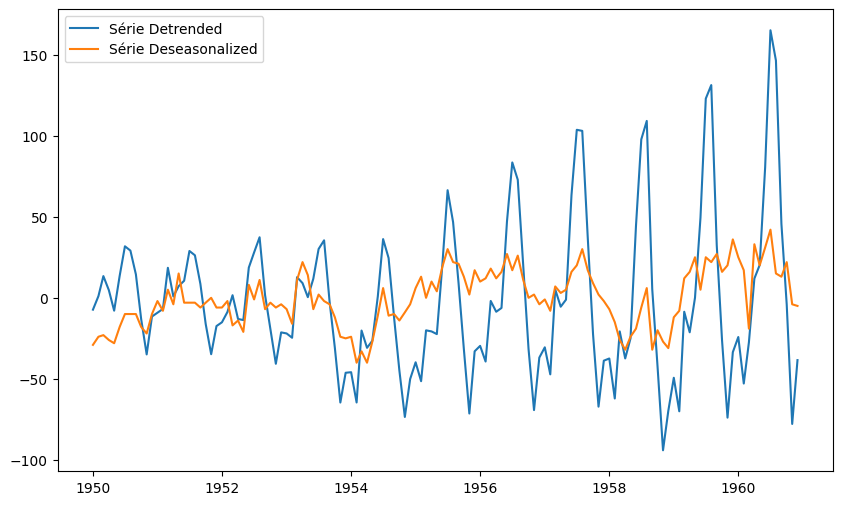

In [6]:
# Plotar a série detrended e a série deseasonalized
plt.figure(figsize=(10,6))
plt.plot(data.index[12:], detrended[12:], label='Série Detrended')
plt.plot(data.index[12:], deseasonalized, label='Série Deseasonalized')
plt.legend()
plt.show()